<a href="https://colab.research.google.com/github/daffayudisaa/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


 Mwngubah Tingkat Kecerahan Citra 
----------------------------------
Masukkan Nilai Kecerahan: 80


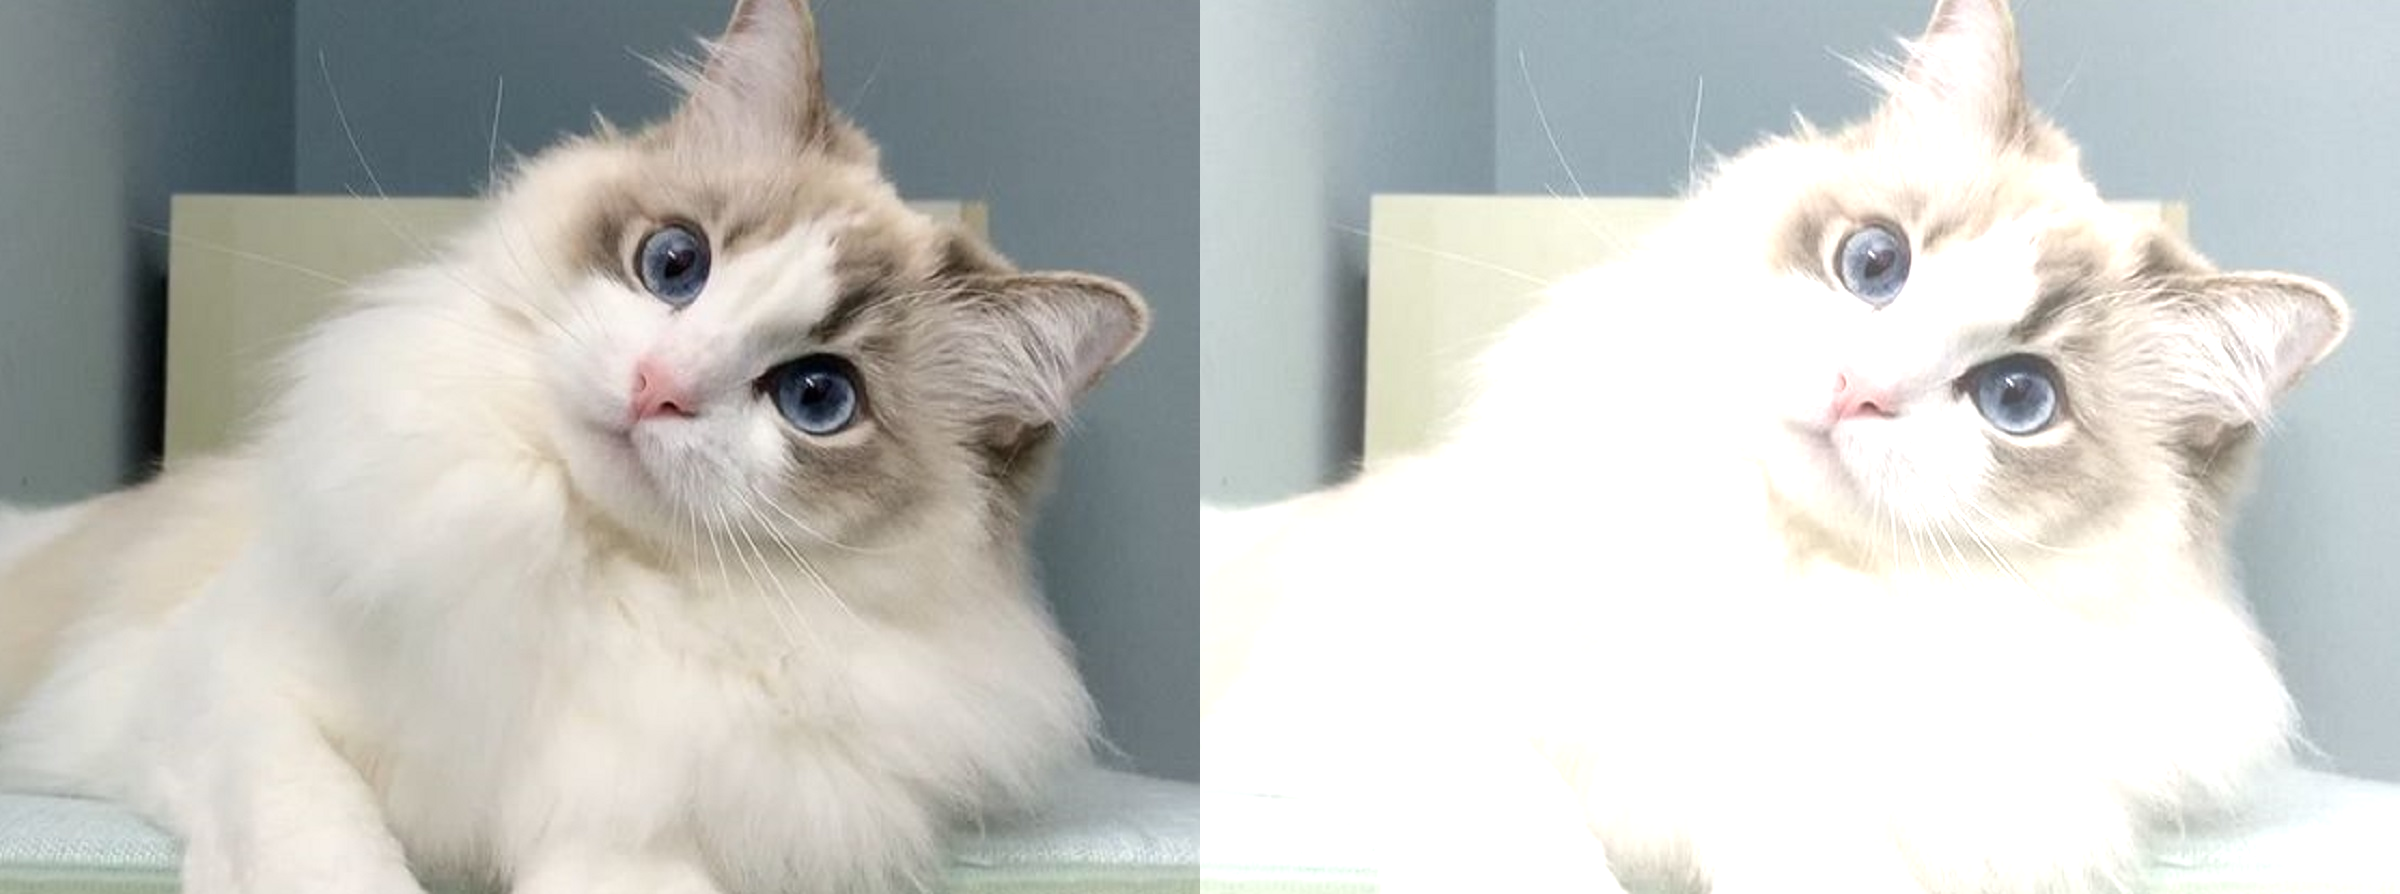

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mwngubah Tingkat Kecerahan Citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan Nilai Kecerahan: '))
except ValueError:
  print('Error, Not a Number')

original = cv.imread('/content/drive/MyDrive/PCVK/Cute Cat.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**Tugas Praktikum**

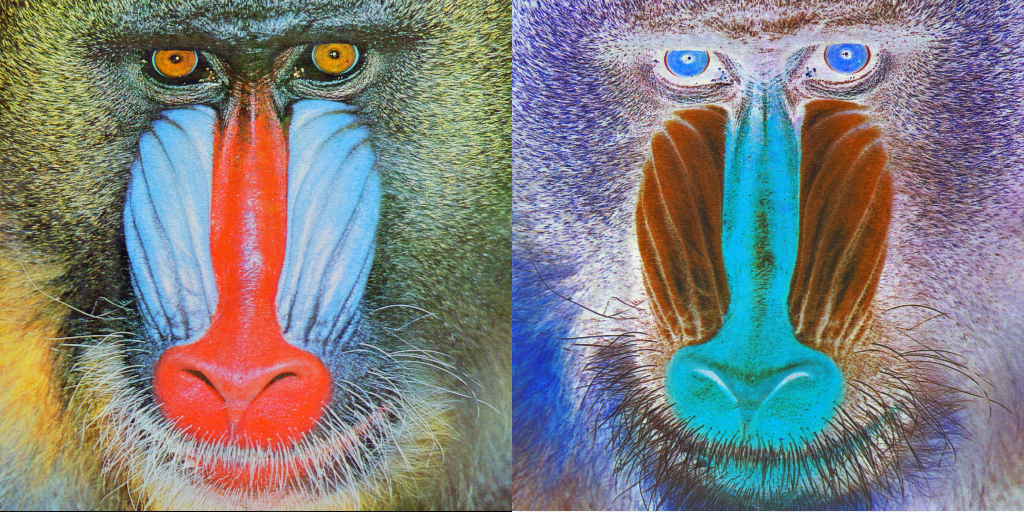

In [6]:
#1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori
image = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
inverse_citra = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      inverse_citra[y,x,c] = np.clip(255 - image[y,x,c] , 0, 255)

final_frame = cv.hconcat((image,inverse_citra))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


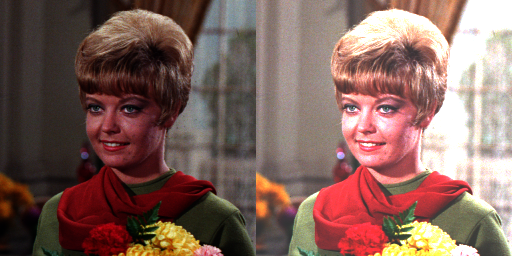

In [4]:
#2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))

except ValueError:
  print('Error, not a number')

image= cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(image.shape, image.dtype)

# akses per pixel
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      brightness_image[y,x,c] = np.clip( contrast * image[y,x,c] + brightness, 0, 255)

# cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(image,brightness_image)

final_frame = cv.hconcat((image,brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan trasnformasi log
--------------------------------------------------------
Masukkan nilai kecerahan : 50


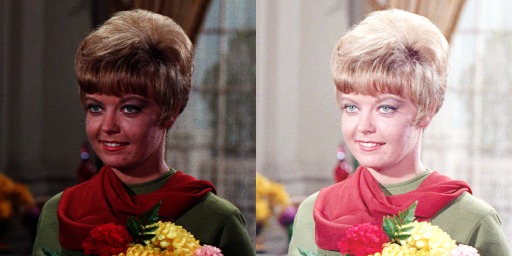

In [5]:
#3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log
import math
print('Mengubah tingkat kecerahan citra dengan trasnformasi log')
print('--------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan : '))

except ValueError:
  print('Error, not a number')

image = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(image.shape, image.dtype)

# akses per pixel
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      brightness_image[y,x,c] = np.clip( brightness * math.log((1 + image[y,x,c])), 0, 255)

# cara simpel tanpa for loop
# brightness_image = cv.convertScaleAbs(image,brightness_image)

final_frame = cv.hconcat((image,brightness_image))
cv2_imshow(final_frame)

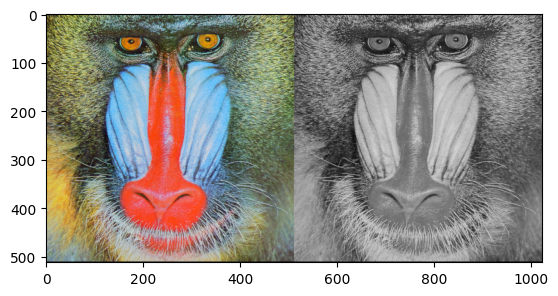

In [12]:
#4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori
#A. Averaging
import matplotlib.pyplot as plt
image = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
brightness_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
      brightness_image[y,x] = np.clip(np.mean(image[y,x]), 0, 255)

final_frame = cv.hconcat((image,brightness_image))
plt.imshow(cv.hconcat((image,brightness_image)))


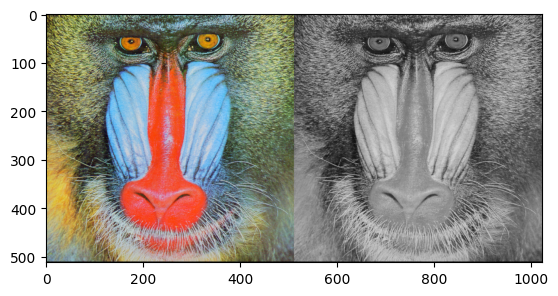

In [29]:
#B. Lightness

# Membaca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

brightness_image = np.zeros(image.shape, dtype=np.uint8)

# Loop untuk menghitung lightness
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        r = int(image[y, x, 0])  # Konversi ke tipe int agar menghindari overflow
        g = int(image[y, x, 1])
        b = int(image[y, x, 2])
        lightness = (max(r, g, b) + min(r, g, b)) // 2  # Integer division untuk lightness
        brightness_image[y, x] = [lightness, lightness, lightness]  # Simpan ke 3 channel RGB

final_frame = cv.hconcat([image, brightness_image])

plt.imshow(final_frame)

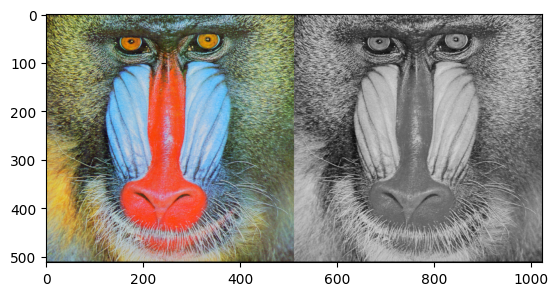

In [20]:
#C. Luminance
image = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
brightness_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
      r= image[y,x,0]
      g= image[y,x,1]
      b= image[y,x,2]
      brightness_image[y,x] = np.clip((0.21*r)+(0.72*g)+(0.07*b), 0, 255)

final_frame = cv.hconcat((image,brightness_image))
plt.imshow(final_frame)

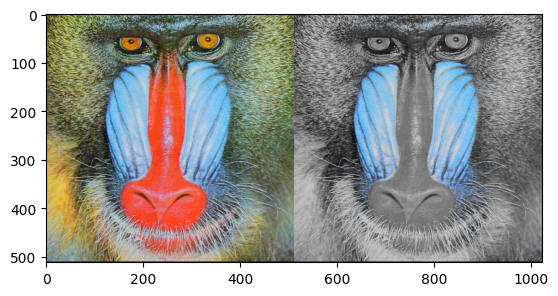

In [25]:
# 5.Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
# biru menjadi grayscale

image = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
image_fix = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Ubah ke HSV
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Tentukan rentang warna biru di HSV
lower_blue = np.array([100,50,50])
upper_blue = np.array([130,255,255])

# Ambil mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Terapkan mask ke gambar asli
res = cv.bitwise_and(image,image, mask= mask)

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan bagian biru dan bagian grayscale
result = np.where(res != 0, res, gray_bgr)
result_fix = cv.cvtColor(result, cv.COLOR_BGR2RGB)

final_frame = cv.hconcat((image_fix,result_fix))
plt.imshow(final_frame)